In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EXTERNAL VALIDATION HT

In [86]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/prediction_validation_external_metrics_layer.csv'
path = '/home/mr1142/Documents/Data/models/neumonia/ht/prediction_validation_external_metrics.csv'

df = pd.read_csv(path)

In [87]:
df.sort_values('auc')

,backbone,frozen_prop,batch,lr,mask,val_auc,auc,younden,pr_max,pr_cut,...,recall_score_pr_cut,accuracy_score_pr_cut,f1_score_0.5,precision_score_0.5,recall_score_0.5,accuracy_score_0.5,f1_score_max,precision_score_max,recall_score_max,accuracy_score_max
56,Xception,0.642949,8,0.000308,True,0.953065,0.825447,0.908192,0.051766,0,...,0.444294,0.444294,0.752685,0.759823,0.751936,0.751936,0.750995,0.758688,0.750257,0.750257
23,Xception,0.321857,8,0.000227,True,0.957214,0.832391,0.863308,0.534244,0,...,0.444294,0.444294,0.688202,0.766779,0.697350,0.697350,0.678282,0.765511,0.689279,0.689279
37,Xception,0.866547,8,0.000137,False,0.957497,0.832657,0.053363,0.004977,0,...,0.444294,0.444294,0.667212,0.741662,0.696557,0.696557,0.670392,0.734500,0.696883,0.696883
88,Xception,0.589082,8,0.000399,False,0.952442,0.834276,0.813811,0.509280,0,...,0.444294,0.444294,0.717930,0.763458,0.721331,0.721331,0.696800,0.755940,0.702715,0.702715
15,Xception,0.582780,8,0.000415,True,0.936781,0.844227,0.905338,0.086500,0,...,0.444294,0.444294,0.742169,0.768557,0.742932,0.742932,0.737030,0.766551,0.738173,0.738173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Xception,0.479613,8,0.000467,False,0.952122,0.911862,0.409360,0.361227,0,...,0.444294,0.444294,0.839031,0.839681,0.839647,0.839647,0.842416,0.842380,0.842587,0.842587
85,Xception,0.452430,8,0.000164,True,0.953410,0.911901,0.414561,0.204078,0,...,0.444294,0.444294,0.835488,0.835536,0.835448,0.835448,0.835504,0.837145,0.835122,0.835122
75,Xception,0.952915,8,0.000281,True,0.954233,0.911909,0.039640,0.014845,0,...,0.444294,0.444294,0.806867,0.819244,0.810861,0.810861,0.812775,0.821775,0.815900,0.815900
59,Xception,0.933950,8,0.000444,True,0.947453,0.914929,0.165408,0.077728,0,...,0.444294,0.444294,0.820197,0.826721,0.822618,0.822618,0.831975,0.833716,0.833022,0.833022


In [93]:
grouped = df.groupby(['backbone', 'frozen_prop', 'lr', 'mask']).agg({'auc': ['mean'], 'f1_score_max': ['mean'], 
                                                                     'precision_score_max': ['mean'],
                                                                    'accuracy_score_max': ['mean'],
                                                                    'recall_score_max': ['mean']})
grouped = grouped.reset_index()
grouped.sort_values(('auc', 'mean'))

,backbone,frozen_prop,lr,mask,auc,f1_score_max,precision_score_max,accuracy_score_max,recall_score_max
,,,,,mean,mean,mean,mean,mean
20,Xception,0.866547,0.000137,False,0.849081,0.730047,0.761486,0.742947,0.742947
1,Xception,0.321857,0.000227,True,0.857156,0.743095,0.783040,0.747784,0.747784
7,Xception,0.455712,0.000032,False,0.865047,0.770945,0.778406,0.771609,0.771609
14,Xception,0.582780,0.000415,True,0.866028,0.766984,0.787686,0.768079,0.768079
13,Xception,0.503459,0.000406,True,0.866818,0.776240,0.788445,0.776103,0.776103
0,Xception,0.319167,0.000175,False,0.869141,0.773207,0.794662,0.775388,0.775388
17,Xception,0.641734,0.000064,False,0.869875,0.776742,0.793327,0.777254,0.777254
18,Xception,0.642949,0.000308,True,0.870021,0.774276,0.791606,0.775124,0.775124
29,Xception,0.961439,0.000446,False,0.870108,0.787080,0.792393,0.787518,0.787518


In [59]:
y = 'auc'
data = df
lim = np.percentile(data[y], 20)

[(0.8, 1.0)]

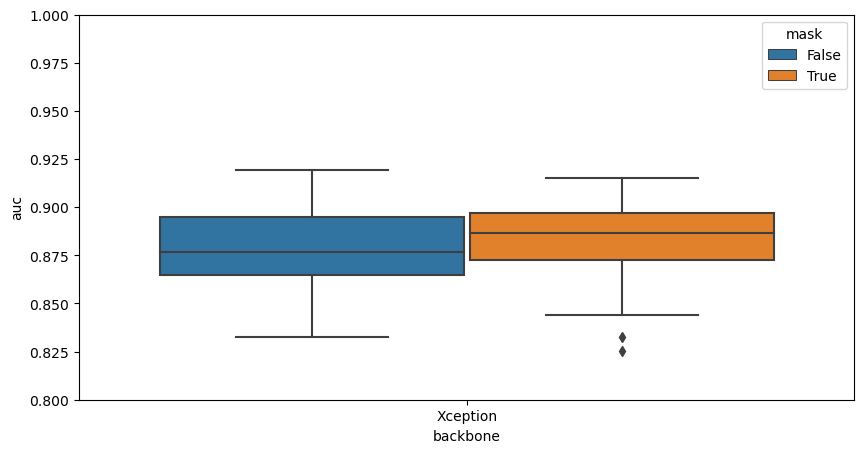

In [60]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="backbone", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.8, 1))

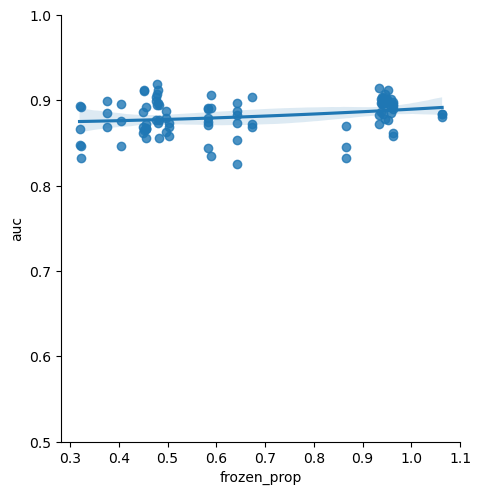

In [62]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="frozen_prop", y=y,
                data=data, order = 2)
p.set(ylim=(0.5, 1))

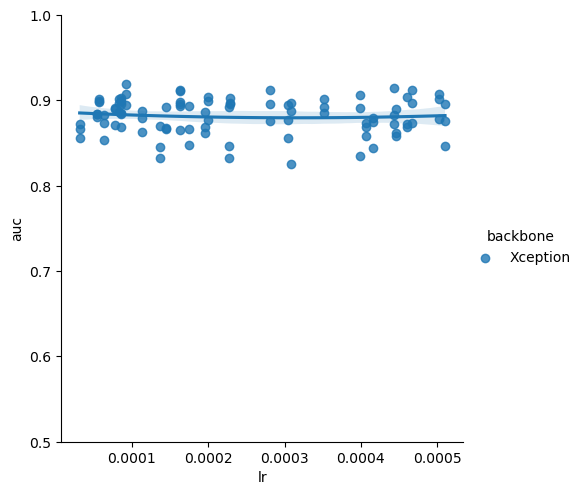

In [63]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="lr", y=y,
                hue="backbone",
                data=data, order = 2)
p.set(ylim=(0.5, 1))

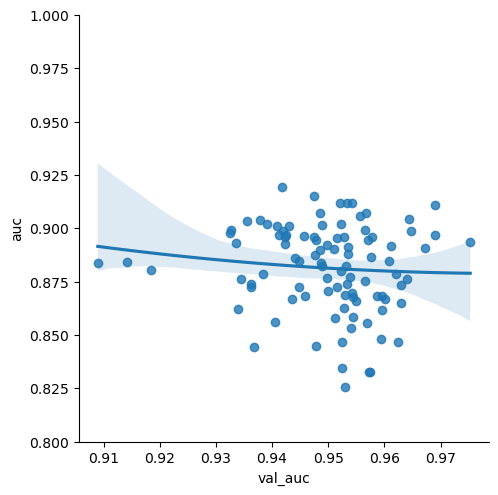

In [66]:
# plt.subplots(figsize=(10,5))
data = data[data.auc > 0.8]
p = sns.lmplot(x="val_auc", y='auc',
                data=data, order = 2)
p.set(ylim=(0.8, 1))

In [71]:
import json
f = open('/home/mr1142/Documents/Data/models/neumonia/ht/results.json')
data = json.load(f)

In [74]:
data.keys()

dict_keys(['random_params', 'random_params_objective', 'params_tried', 'objective_values', 'surrogate_values', 'best_objective', 'best_params'])

In [75]:
data['best_params']

{'backbone': 'Xception',
 'frozen_prop': 0.4777558875676132,
 'lr': 9.216787731447473e-05,
 'mask': False}

In [76]:
data['best_objective']

0.9070408301051823